<a href="https://colab.research.google.com/github/cocoisland/DS-Unit-4-Sprint-4-Deep-Learning/blob/master/LS_DS_Unit_4_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Unit 4 Sprint Challenge 4

## RNNs, CNNs, AutoML, and more...

In this sprint challenge, you'll explore some of the cutting edge of Data Science.

*Caution* - these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Part 1 - RNNs

Use an RNN to fit a simple classification model on tweets to distinguish from tweets from Austen Allred and tweets from Weird Al Yankovic.

Following is code to scrape the needed data (no API auth needed, uses [twitterscraper](https://github.com/taspinar/twitterscraper)):

In [1]:
!pip install twitterscraper

  Stored in directory: /root/.cache/pip/wheels/45/50/9b/70128bca07e2bf8b5ed3f504002e9e74a6eaa5e756341b6931
Successfully built twitterscraper


In [2]:
from twitterscraper import query_tweets

austen_tweets = query_tweets('from:austen', 1000)
len(austen_tweets)

INFO: queries: ['from:austen since:2006-03-21 until:2006-11-14', 'from:austen since:2006-11-14 until:2007-07-11', 'from:austen since:2007-07-11 until:2008-03-05', 'from:austen since:2008-03-05 until:2008-10-30', 'from:austen since:2008-10-30 until:2009-06-25', 'from:austen since:2009-06-25 until:2010-02-19', 'from:austen since:2010-02-19 until:2010-10-15', 'from:austen since:2010-10-15 until:2011-06-11', 'from:austen since:2011-06-11 until:2012-02-04', 'from:austen since:2012-02-04 until:2012-09-30', 'from:austen since:2012-09-30 until:2013-05-26', 'from:austen since:2013-05-26 until:2014-01-20', 'from:austen since:2014-01-20 until:2014-09-15', 'from:austen since:2014-09-15 until:2015-05-12', 'from:austen since:2015-05-12 until:2016-01-05', 'from:austen since:2016-01-05 until:2016-08-31', 'from:austen since:2016-08-31 until:2017-04-26', 'from:austen since:2017-04-26 until:2017-12-21', 'from:austen since:2017-12-21 until:2018-08-16', 'from:austen since:2018-08-16 until:2019-04-12']
INFO

181

In [4]:
austen_tweets[0].text

'I love love love working with great people.pic.twitter.com/fCKOm6Vl'

In [5]:
al_tweets = query_tweets('from:AlYankovic', 1000)
len(al_tweets)

INFO: queries: ['from:AlYankovic since:2006-03-21 until:2006-11-14', 'from:AlYankovic since:2006-11-14 until:2007-07-11', 'from:AlYankovic since:2007-07-11 until:2008-03-05', 'from:AlYankovic since:2008-03-05 until:2008-10-30', 'from:AlYankovic since:2008-10-30 until:2009-06-25', 'from:AlYankovic since:2009-06-25 until:2010-02-19', 'from:AlYankovic since:2010-02-19 until:2010-10-15', 'from:AlYankovic since:2010-10-15 until:2011-06-11', 'from:AlYankovic since:2011-06-11 until:2012-02-04', 'from:AlYankovic since:2012-02-04 until:2012-09-30', 'from:AlYankovic since:2012-09-30 until:2013-05-26', 'from:AlYankovic since:2013-05-26 until:2014-01-20', 'from:AlYankovic since:2014-01-20 until:2014-09-15', 'from:AlYankovic since:2014-09-15 until:2015-05-12', 'from:AlYankovic since:2015-05-12 until:2016-01-05', 'from:AlYankovic since:2016-01-05 until:2016-08-31', 'from:AlYankovic since:2016-08-31 until:2017-04-26', 'from:AlYankovic since:2017-04-26 until:2017-12-21', 'from:AlYankovic since:2017-12

960

In [34]:
al_tweets[0].user, al_tweets[0].text

('alyankovic',
 'RT @GeoffTheRobot: Hey Al, you played zydeco on my ribs at the RED premiere and it airs tonight on Late Late with @CraigyFerg!')

In [35]:
len(austen_tweets + al_tweets), len(austen_tweets), len(al_tweets)

(1141, 181, 960)

In [0]:
# Extract Tweet objects user into Y, text into X
X = []
Y = []

for i in range(len(austen_tweets)):
  X.append(austen_tweets[i].text)
  Y.append(austen_tweets[i].user)
  
for i in range(len(al_tweets)):
  X.append(al_tweets[i].user)
  Y.append(al_tweets[i].text)

In [121]:
len(X), len(Y)

(1141, 1141)

In [0]:
strtext = ' '.join(X)

In [123]:
chars = list(set(X)) # split and remove duplicate characters. convert to list.

num_chars = len(chars) # the number of unique characters
txt_data_size = len(X)

print("unique characters : ", num_chars)
print("txt_data_size : ", txt_data_size)

print(f'rows of chars\n{chars}')

unique characters :  179
txt_data_size :  1141
rows of chars
['We had a deck for the A though :)', 'TSLA calls are outrageously expensive', "You're not a real startup until at least *one* city has banned you", 'You still pay a percentage of software income once it’s over $50k regardless of where it comes from', "Salaries are usually a bit lower in Dallas, honestly. \n\nI wouldn't say you were underpaid, but Lambda School grads pretty systematically end up getting paid more than their local bootcamp peers.", "Looks great. The trick is getting students to you or vise versa considering we're all over the US", 'Just might!', '$17 in the bank and driving for Lyft to get by today\n\n$80k + $5k signing bonus + full benefits job starts Monday\n\n#lambdaschoolpic.twitter.com/anBZPkoqUo', 'SpaceX 2002 vs 2017pic.twitter.com/dtzBID2Q3v', 'And how does the company do that?\n\nTurns out it’s incentives all the way down.pic.twitter.com/bwlavLEGBZ', "haven't graduated yet", "See those quote marks? Th

In [125]:
# one hot encode
char_to_int = dict((c, i) for i, c in enumerate(chars)) # "enumerate" retruns index and value. Convert it to dictionary
int_to_char = dict((i, c) for i, c in enumerate(chars))
print(f'Length of char_to_int = {len(char_to_int)}, int_to_char={ len(int_to_char) }')
print(f'First 5 rows of char_to_int dictionary \n{ list(char_to_int.items())[0:5] }')
print("----------------------------------------------------")

# integer encode input data
#integer_encoded = [char_to_int[i] for i in strtext] # "integer_encoded" is a list which has a sequence converted from an original data to integers.
#print("integer_encoded data length : ", len(integer_encoded))
#print(f'5 rows of integer_encode={ integer_encoded[0:5] }')

Length of char_to_int = 179, int_to_char=179
First 5 rows of char_to_int dictionary 
[('We had a deck for the A though :)', 0), ('TSLA calls are outrageously expensive', 1), ("You're not a real startup until at least *one* city has banned you", 2), ('You still pay a percentage of software income once it’s over $50k regardless of where it comes from', 3), ("Salaries are usually a bit lower in Dallas, honestly. \n\nI wouldn't say you were underpaid, but Lambda School grads pretty systematically end up getting paid more than their local bootcamp peers.", 4)]
----------------------------------------------------


In [128]:
len(char_to_int.values())

179

In [0]:
# hyperparameters

iteration = 100
sequence_length = 40 # guessing width of text
batch_size = round((txt_data_size /sequence_length)+0.5) # = math.ceil
hidden_size = 50  # size of hidden layer of neurons.  
learning_rate = 1e-1

# model parameters

W_xh = np.random.randn(hidden_size, num_chars)*0.01     # weight input -> hidden. 
W_hh = np.random.randn(hidden_size, hidden_size)*0.01   # weight hidden -> hidden
W_hy = np.random.randn(num_chars, hidden_size)*0.01     # weight hidden -> output

b_h = np.zeros((hidden_size, 1)) # hidden bias
b_y = np.zeros((num_chars, 1)) # output bias

h_prev = np.zeros((hidden_size,1)) # h_(t-1)

In [0]:
def forwardprop(inputs, targets, h_prev):
        
    # Since the RNN receives the sequence, the weights are not updated during one sequence.
    xs, hs, ys, ps = {}, {}, {}, {} # dictionary
    hs[-1] = np.copy(h_prev) # Copy previous hidden state vector to -1 key value.
    loss = 0 # loss initialization
    
    for t in range(len(inputs)): # t is a "time step" and is used as a key(dic).  
        
        xs[t] = np.zeros((num_chars,1)) 
        xs[t][inputs[t]] = 1
        hs[t] = np.tanh(np.dot(W_xh, xs[t]) + np.dot(W_hh, hs[t-1]) + b_h) # hidden state. 
        ys[t] = np.dot(W_hy, hs[t]) + b_y # unnormalized log probabilities for next chars
        ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t])) # probabilities for next chars. 
        # Softmax. -> The sum of probabilities is 1 even without the exp() function, but all of the elements are positive through the exp() function.
 
        loss += -np.log(ps[t][targets[t],0]) # softmax (cross-entropy loss). Efficient and simple code

#         y_class = np.zeros((num_chars, 1)) 
#         y_class[targets[t]] =1
#         loss += np.sum(y_class*(-np.log(ps[t]))) # softmax (cross-entropy loss)        

    return loss, ps, hs, xs

In [0]:
def backprop(ps, inputs, hs, xs):

    dWxh, dWhh, dWhy = np.zeros_like(W_xh), np.zeros_like(W_hh), np.zeros_like(W_hy) # make all zero matrices.
    dbh, dby = np.zeros_like(b_h), np.zeros_like(b_y)
    dhnext = np.zeros_like(hs[0]) # (hidden_size,1) 

    # reversed
    for t in reversed(range(len(inputs))):
        dy = np.copy(ps[t]) # shape (num_chars,1).  "dy" means "dloss/dy"
        dy[targets[t]] -= 1 # backprop into y. After taking the soft max in the input vector, subtract 1 from the value of the element corresponding to the correct label.
        dWhy += np.dot(dy, hs[t].T)
        dby += dy 
        dh = np.dot(W_hy.T, dy) + dhnext # backprop into h. 
        dhraw = (1 - hs[t] * hs[t]) * dh # backprop through tanh nonlinearity #tanh'(x) = 1-tanh^2(x)
        dbh += dhraw
        dWxh += np.dot(dhraw, xs[t].T)
        dWhh += np.dot(dhraw, hs[t-1].T)
        dhnext = np.dot(W_hh.T, dhraw)
    for dparam in [dWxh, dWhh, dWhy, dbh, dby]: 
        np.clip(dparam, -5, 5, out=dparam) # clip to mitigate exploding gradients.  
    
    return dWxh, dWhh, dWhy, dbh, dby

In [119]:
%%time

data_pointer = 0

# memory variables for Adagrad
mWxh, mWhh, mWhy = np.zeros_like(W_xh), np.zeros_like(W_hh), np.zeros_like(W_hy)
mbh, mby = np.zeros_like(b_h), np.zeros_like(b_y) 

for i in range(iteration):
    h_prev = np.zeros((hidden_size,1)) # reset RNN memory
    data_pointer = 0 # go from start of data
    
    for b in range(batch_size):
        
        inputs = [char_to_int[ch] for ch in strtext[data_pointer:data_pointer+sequence_length]]
        targets = [char_to_int[ch] for ch in strtext[data_pointer+1:data_pointer+sequence_length+1]] # t+1        
            
        if (data_pointer+sequence_length+1 >= len(strtext) and b == batch_size-1): # processing of the last part of the input data. 
#             targets.append(char_to_int[txt_data[0]])   # When the data doesn't fit, add the first char to the back.
            targets.append(char_to_int[" "])   # When the data doesn't fit, add space(" ") to the back.


        # forward
        loss, ps, hs, xs = forwardprop(inputs, targets, h_prev)
#         print(loss)
    
        # backward
        dWxh, dWhh, dWhy, dbh, dby = backprop(ps, inputs, hs, xs) 
        
    # perform parameter update with Adagrad
        for param, dparam, mem in zip([W_xh, W_hh, W_hy, b_h, b_y], 
                                    [dWxh, dWhh, dWhy, dbh, dby], 
                                    [mWxh, mWhh, mWhy, mbh, mby]):
            mem += dparam * dparam # elementwise
            param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update      
    
        data_pointer += sequence_length # move data pointer
        
    if i % 10 == 0:
        print ('iter %d, loss: %f' % (i, loss)) # print progress        
        


iter 0, loss: 0.430477
iter 10, loss: 0.809778
iter 20, loss: 0.835608
iter 30, loss: 0.859614
iter 40, loss: 0.866333
iter 50, loss: 0.865489
iter 60, loss: 0.866943
iter 70, loss: 0.876200
iter 80, loss: 0.893254
iter 90, loss: 0.900999
CPU times: user 4min 18s, sys: 115 ms, total: 4min 18s
Wall time: 4min 18s


In [0]:
def predict(test_char, length):
    x = np.zeros((num_chars, 1)) 
    x[char_to_int[test_char]] = 1
    ixes = []
    h = np.zeros((hidden_size,1))

    for t in range(length):
        h = np.tanh(np.dot(W_xh, x) + np.dot(W_hh, h) + b_h) 
        y = np.dot(W_hy, h) + b_y
        p = np.exp(y) / np.sum(np.exp(y)) 
        ix = np.random.choice(range(num_chars), p=p.ravel()) # ravel -> rank0
        # "ix" is a list of indexes selected according to the soft max probability.
        x = np.zeros((num_chars, 1)) # init
        x[ix] = 1 
        ixes.append(ix) # list
    txt = test_char + ''.join(int_to_char[i] for i in ixes)
    print ('----\n %s \n----' % (txt, ))

In [0]:
predict('w',20)

In [137]:
raw_text = str(X).lower()
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

Total Characters:  593
Total Vocab:  15
Total Patterns:  493


In [138]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, train_size=0.75, test_size=0.25)
len(x_train), len(x_test), len(y_train), len(y_test)

(369, 124, 369, 124)

In [148]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
# fit the model
#model.fit(x_train, y_train, epochs=20, batch_size=128, callbacks=callbacks_list)

print('Train...')
model.fit(x_train, y_train,
          batch_size=128,
          epochs=15,
          validation_data=(x_test, y_test))
score= model.evaluate(x_test, y_test, batch_size=128)
print('Test score:', score)
#print('Test accuracy:', acc)

Train...
Train on 369 samples, validate on 124 samples
Epoch 1/15
369/369 [==============================] - 9s 23ms/step - loss: 2.7006 - val_loss: 2.6856
Epoch 2/15
369/369 [==============================] - 1s 2ms/step - loss: 2.6660 - val_loss: 2.6586
Epoch 3/15
369/369 [==============================] - 1s 2ms/step - loss: 2.6827 - val_loss: 2.6612
Epoch 4/15
369/369 [==============================] - 1s 2ms/step - loss: 2.5715 - val_loss: 2.6461
Epoch 5/15
369/369 [==============================] - 1s 2ms/step - loss: 2.6034 - val_loss: 2.6481
Epoch 6/15
369/369 [==============================] - 1s 2ms/step - loss: 2.6026 - val_loss: 2.6456
Epoch 7/15
369/369 [==============================] - 1s 2ms/step - loss: 2.5883 - val_loss: 2.6436
Epoch 8/15
369/369 [==============================] - 1s 2ms/step - loss: 2.5665 - val_loss: 2.6807
Epoch 9/15
369/369 [==============================] - 1s 2ms/step - loss: 2.5550 - val_loss: 2.6772
Epoch 10/15
369/369 [=======================

Your tasks:

- Encode the characters to a sequence of integers for the model
- Get the data into the appropriate shape/format, including labels and a train/test split
- Use Keras to fit a predictive model, classifying tweets as being from Austen versus Weird Al
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

*Note* - focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [62]:
from keras.datasets import imdb
(x_train1, y_train1), (x_test1, y_test1) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 1s 0us/step


In [67]:
x_train1.shape, y_train1.shape

((25000,), (25000,))

In [0]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = round((txt_data_size /sequence_length)+0.5)



print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
#print('x_train shape:', x_train.shape)
#print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Conclusion - RNN runs, and gives pretty decent improvement over a naive "It's Al!" model. To *really* improve the model, more playing with parameters, and just getting more data (particularly Austen tweets), would help. Also - RNN may well not be the best approach here, but it is at least a valid one.

## Part 2- CNNs

Time to play "find the frog!" Use Keras and ResNet50 to detect which of the following images contain frogs:

In [80]:
!pip install google_images_download

    100% |████████████████████████████████| 911kB 21.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/d2/23/84/3cec6d566b88bef64ad727a7e805f6544b8af4a8f121f9691c
Successfully built google-images-download


In [81]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1. pondanimals.gif
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2. hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 3. pkls4116_inline.png
Image URL: https://vetstreet-brightspot.s3.amazonaws.com/8d/ac/377fecad46d8820697c26efacc32/koi-pond-thinkstock-153560141-335sm61313.jpg
Completed Image ====> 4. koi-pond-thinkstock-153560141-335sm61313.jpg
Image URL: https://pixnio.com/free-images/fauna-animals/reptiles-and-amphibians/alligators-and-crocodiles-pictures/alligator-animal-on-pond.jpg
Completed Image ====> 5. alligator-animal-on-pond.jpg

Errors: 0



In [85]:
!ls downloads/'animal pond'

'1. pondanimals.gif'	  '4. koi-pond-thinkstock-153560141-335sm61313.jpg'
'2. hqdefault.jpg'	  '5. alligator-animal-on-pond.jpg'
'3. pkls4116_inline.png'


At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [82]:
# Imports
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps  # https://pillow.readthedocs.io/en/stable/
import tensorflow as tf
import tensorflow_hub as hub

W0412 16:42:54.747457 140240349935488 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [0]:
# Resize all images to 224x224 pixels
image_path_list = absolute_image_paths['animal pond']

def resize_image(filename, new_width=256, new_height=256):
  pil_image = Image.open(filename)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  pil_image_rgb = pil_image.convert('RGB')
  pil_image_rgb.save(filename, format='JPEG', quality=90)

for path in image_path_list:
  resize_image(path, 224, 224)

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def interpret(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  return results

In [89]:
all_predictions = []
for i, image_path in enumerate(image_path_list):
  results = interpret(process_img_path(image_path))
  all_predictions.append(results)
  print(results)

Instructions for updating:
Colocations handled automatically by placer.


W0412 16:47:53.228843 140240349935488 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


40960/35363 [==================================] - 0s 2us/step
[('n06359193', 'web_site', 0.8918389), ('n04404412', 'television', 0.08547714), ('n04152593', 'screen', 0.006043785)]
[('n01443537', 'goldfish', 0.57714343), ('n02536864', 'coho', 0.3193861), ('n01630670', 'common_newt', 0.020654997)]
[('n04243546', 'slot', 0.9574489), ('n04476259', 'tray', 0.014238177), ('n03908618', 'pencil_box', 0.007384028)]
[('n01443537', 'goldfish', 0.9936445), ('n09256479', 'coral_reef', 0.004871838), ('n12985857', 'coral_fungus', 0.0005042087)]
[('n01698640', 'American_alligator', 0.59087384), ('n01737021', 'water_snake', 0.13598265), ('n01697457', 'African_crocodile', 0.07479092)]


web_site: 0.892
television: 0.085
screen: 0.006


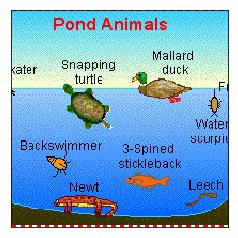


goldfish: 0.577
coho: 0.319
common_newt: 0.021


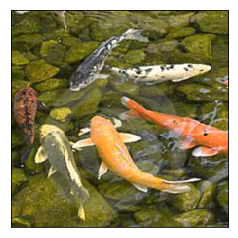


slot: 0.957
tray: 0.014
pencil_box: 0.007


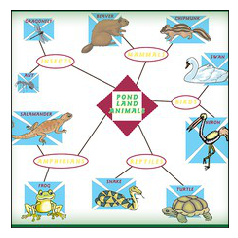


goldfish: 0.994
coral_reef: 0.005
coral_fungus: 0.001


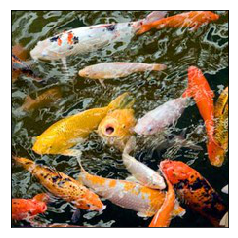


American_alligator: 0.591
water_snake: 0.136
African_crocodile: 0.075


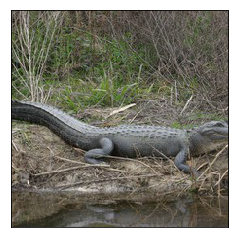

In [90]:
for path, prediction in zip(image_path_list, all_predictions):
  
  for _, animal, prob in prediction:
    print(f'{animal}: {prob:.3f}')

  plt.subplot()
  plt.imshow(np.asarray(Image.open(path)))
  plt.grid(False)
  plt.yticks([])
  plt.xticks([])
  plt.show()
  print()

## Part 3 - AutoML

Use [TPOT](https://github.com/EpistasisLab/tpot) to fit a predictive model for the King County housing data, with `price` as the target output variable.

In [91]:
!pip install tpot

    100% |████████████████████████████████| 81kB 6.7MB/s 
    100% |████████████████████████████████| 942kB 21.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
  Stored in directory: /root/.cache/pip/wheels/22/ea/bf/dc7c8a2262025a0ab5da9ef02282c198be88902791ca0c6658
Successfully built stopit deap


In [92]:
!wget https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv

--2019-04-12 16:51:37--  https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.40M  --.-KB/s    in 0.04s   

2019-04-12 16:51:37 (55.4 MB/s) - ‘kc_house_data.csv’ saved [2515206/2515206]



In [93]:
!head kc_house_data.csv

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
"7129300520","20141013T000000",221900,3,1,1180,5650,"1",0,0,3,7,1180,0,1955,0,"98178",47.5112,-122.257,1340,5650
"6414100192","20141209T000000",538000,3,2.25,2570,7242,"2",0,0,3,7,2170,400,1951,1991,"98125",47.721,-122.319,1690,7639
"5631500400","20150225T000000",180000,2,1,770,10000,"1",0,0,3,6,770,0,1933,0,"98028",47.7379,-122.233,2720,8062
"2487200875","20141209T000000",604000,4,3,1960,5000,"1",0,0,5,7,1050,910,1965,0,"98136",47.5208,-122.393,1360,5000
"1954400510","20150218T000000",510000,3,2,1680,8080,"1",0,0,3,8,1680,0,1987,0,"98074",47.6168,-122.045,1800,7503
"7237550310","20140512T000000",1.225e+006,4,4.5,5420,101930,"1",0,0,3,11,3890,1530,2001,0,"98053",47.6561,-122.005,4760,101930
"1321400060","20140627T000000",257500,3,2.25,1715,6819,"2",0,0,3,7,1715,0,1995,0,"98003",47.3097,-122.327,2238,6819
"2

As with previous questions, your goal is to run TPOT and successfully run and report error at the end.  Also, in the interest of time, feel free to choose small `generation=1` and `population_size=10` parameters so your pipeline runs efficiently and you are able to iterate and test.

*Hint* - you'll have to drop and/or type coerce at least a few variables to get things working. It's fine to err on the side of dropping to get things running, as long as you still get a valid model with reasonable predictive power.

In [94]:
import pandas as pd

df = pd.read_csv('kc_house_data.csv')
df.shape

(21613, 21)

In [101]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [0]:
df1 = df.drop(['id','date'],axis=1)

In [104]:
df1.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

X = df1.drop('price', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(
    X, df1['price'].values, train_size=0.75, test_size=0.25)

In [106]:
from tpot import TPOTRegressor


tpot = TPOTRegressor(generations=1, population_size=10, verbosity=3)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

29 operators have been imported by TPOT.


Generation 1 - Current Pareto front scores:
-1	-21264189815.40271	ExtraTreesRegressor(input_matrix, ExtraTreesRegressor__bootstrap=True, ExtraTreesRegressor__max_features=0.45, ExtraTreesRegressor__min_samples_leaf=2, ExtraTreesRegressor__min_samples_split=10, ExtraTreesRegressor__n_estimators=100)
-2	-18922633061.336678	RandomForestRegressor(GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.8, GradientBoostingRegressor__learning_rate=0.01, GradientBoostingRegressor__loss=lad, GradientBoostingRegressor__max_depth=7, GradientBoostingRegressor__max_features=0.9500000000000001, GradientBoostingRegressor__min_samples_leaf=16, GradientBoostingRegressor__min_samples_split=15, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.2), RandomForestRegressor__bootstrap=False, RandomForestRegressor__max_features=0.15000000000000002, RandomForestRegressor__min_samples_leaf=1, RandomForestRegressor__min_samples_split=15, RandomForestRegressor__

In [108]:
print(f'tpot Loss= {tpot.score(X_test, y_test)}')

tpot Loss= -20025856722.987976


## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
- What area of Data Science would you most like to learn more about, and why?
- Where do you think Data Science will be in 5 years?

A few sentences per answer is fine - only elaborate if time allows.

Would like to learn more about Deep Learning, but still have a lot to learn or master.

In 5 years, everyone will be Data scientist whose job is to evaluate prediction models and override wrong model predictions.

Thank you for your hard work, and congratulations! You've learned a lot, and should proudly call yourself a Data Scientist.